# Evaluation of trained models

## Imports

In [15]:
import pandas as pd

from eval_lib import load_model
from models import Transformer, VPTransformer
from matplotlib import pyplot as plt
import numpy as np
import torch
from data_handling import data_loader
import utils
import pprint
from trainer_lib.datasets import TimeSeriesWindowedTensorDataset, TimeSeriesWindowedDatasetConfig
from signal_decomposition import eemd, wavelet

## Load models

In [16]:
load_params = [#{'test': 'regular', 'name': 'Dangerous_Penguin', 'epoch': 30, 'model_type': Transformer},
               #{'test': 'eemd', 'name': 'Annoyed_Turtle', 'epoch': 30, 'model_type': Transformer},
               {'test': 'vp_wavelet', 'name': 'Dangerous_Penguin', 'epoch': 30, 'model_type': VPTransformer}]

post_processors = [lambda x : x,
                   #lambda x : x,
                   #lambda x : torch.sum(x, dim=-1),
                   #lambda x : torch.sum(x, dim=-1)]
                   ]

trained = [{'params': None, 'model': None, 'metrics': None, 'post_processor': None} for _ in range(len(load_params))]

for load_param, model in zip(load_params, trained):
    model['params'], model['model'], model['metrics'] = load_model(**load_param)

## Show metrics

### Plot training

Params of vp_wavelet VPTransformer at epoch 30 Dangerous_Penguin
{'d_ff': 2,
 'd_model': 128,
 'dropout': 0.1,
 'kind': 'vp_transformer',
 'num_heads': 2,
 'num_layers': 1,
 'src_seq_length': 192,
 'src_size': 7,
 'src_window': 1,
 'tgt_seq_length': 1,
 'tgt_size': 1,
 'tgt_window': 1,
 'vp_bases': 8,
 'vp_penalty': 0.2}


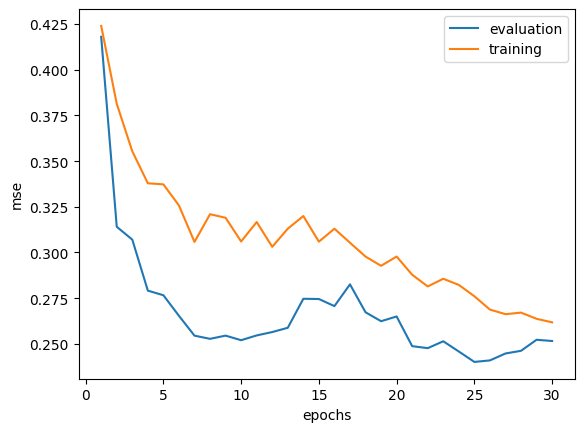

In [17]:
def print_params(test: str, name: str, epoch: int, model_type: type, params: dict):
    print(f'Params of {test} {model_type.__name__} at epoch {epoch} {name}')
    pprint.pprint(params)

def plot_metrics(metrics: dict):
    plt.plot(np.arange(1, len(metrics['eval']['MSE']) + 1), metrics['eval']['MSE'], label=f'evaluation')
    plt.plot(np.arange(1, len(metrics['train']['MSE']) + 1), metrics['train']['MSE'], label=f'training')
    plt.xlabel('epochs')
    plt.ylabel('mse')
    plt.legend()
    plt.show()

for load_param, model in zip(load_params, trained):
    print_params(**load_param, params=model['params'])
    plot_metrics(model['metrics'])

### Show best model

In [18]:
def bold_min(col):
    bold = 'font-weight: bold'
    default = ''
    
    min_in_col = col.min()
    return [bold if v == min_in_col else default for v in col]

d = {'mse': [model['metrics']['eval']['MSE'][-1] for model in trained], 'rmse': [model['metrics']['eval']['RMSE'][-1] for model in trained],
     'mae': [model['metrics']['eval']['MAE'][-1] for model in trained], 'mape': [model['metrics']['eval']['MAPE'][-1] for model in trained]}
df = pd.DataFrame(data=d, index=[f'{load_param["test"]} - {load_param["name"]}' for load_param in load_params])
df.style.apply(bold_min, axis=0)
df

,mse,rmse,mae,mape
vp_wavelet - Dangerous_Penguin,0.251563,0.487214,0.405345,1.489644


## Testing on sample data

### Load sample data

In [19]:
df = data_loader.load_mavir_data('data/mavir_data/mavir.csv')
df['Power'] = utils.min_max_norm(df['Power'])
sample = utils.sample(df, 1000, start_idx=10000)

### Create datasets for models

In [20]:
#decomposed = eemd.EEMDWrapper(sample['Power'].to_numpy(), 3)
#wlt = wavelet.WaveletWrapper(sample['Power'].to_numpy(), 'db2', decomposition_lvl=3)

data = {#'regular': np.array(sample['Power'].to_numpy()[..., np.newaxis], dtype=np.float32),
        #'eemd': np.array(np.concatenate([decomposed.get_imfs().transpose(), decomposed.get_residue()[..., np.newaxis]], dtype=np.float32, axis=1)),
        'vp_wavelet': sample['Power'].to_numpy(),
        # 'regular': sample['Power'].to_numpy()}
}

preprocessors = {'vp_wavelet': wavelet.WaveletPreprocessor('db2'), 'regular': None}

datasets = {}

for load_param, model in zip(load_params, trained):
    datasets[load_param['test']] = TimeSeriesWindowedTensorDataset(data[load_param['test']], 
                                                                   TimeSeriesWindowedDatasetConfig(model['params']['src_window'], 
                                                                   model['params']['tgt_window'], 
                                                                   model['params']['src_seq_length'], 
                                                                   model['params']['tgt_seq_length'], 1, False, False), 
                                                                   preprocessor=preprocessors[load_param['test']])


asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd
asd


### Run the tests on sample data

Params of vp_wavelet VPTransformer at epoch 30 Dangerous_Penguin
{'d_ff': 2,
 'd_model': 128,
 'dropout': 0.1,
 'kind': 'vp_transformer',
 'num_heads': 2,
 'num_layers': 1,
 'src_seq_length': 192,
 'src_size': 7,
 'src_window': 1,
 'tgt_seq_length': 1,
 'tgt_size': 1,
 'tgt_window': 1,
 'vp_bases': 8,
 'vp_penalty': 0.2}


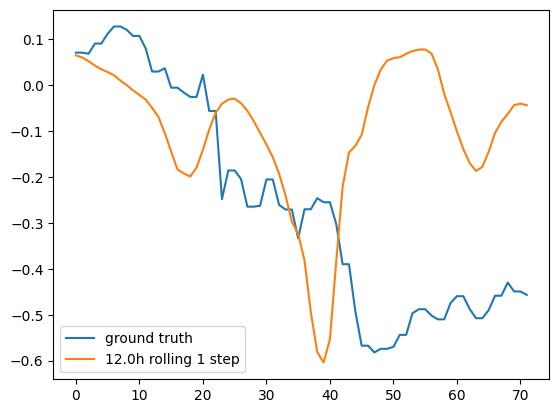

In [21]:
shift, look_back, pred, rolling = 150, 24, 1, 72

def predict_with_model(prediction_model, dataset, post_processor):
    ones = torch.ones(1, 1, dataset[0][1].shape[-1])

    with torch.no_grad():
        gt = []
        p = []
        for shift_offset in range(shift, shift+rolling, pred*dataset.ws_y):
            out = ones
            for i in range(pred):
                out = torch.concatenate((ones, prediction_model(dataset[shift_offset][0].unsqueeze(0), out)), dim=1)
        
            p.append(post_processor(dataset.get_sequence_from_y_windows(out[:, 1:, :].detach())))
            gt.append(post_processor(dataset.get_sequence_from_y_windows(dataset[shift_offset][1])))
        
    return gt, p


for load_param, model, post in zip(load_params, trained, post_processors):
    print_params(**load_param, params=model['params'])
    ground_truth, predicted = predict_with_model(model['model'], datasets[load_param['test']], post)
    predicted = np.array(predicted).reshape(rolling)
    ground_truth = np.array(ground_truth).reshape(rolling)
    
    plt.plot(ground_truth, label='ground truth')
    plt.plot(predicted, label=f'{rolling*10/60}h rolling {pred} step')            
    plt.legend()
    plt.show()